## Level 2

In [92]:
import numpy as np
import matplotlib.pyplot as plt

$
d\omega = 0.1
$

$
\phi = 0.01
$

$
\Omega \times V_{0} = 1
$

In [93]:
dw = 0.1
phi = 0.01

om_v0 = 1

$
H(t) = -\frac{1}{2} \Omega V_{0} s(t) 
\begin{pmatrix}
0                        & e^{i(\text{d} \omega t + \phi)} \\
e^{-i(\text{d} \omega t + \phi)} & 0                       \\
\end{pmatrix}
$

In [94]:
def s(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i] > 10) and (x[i] < 90):
            y[i] = np.pi / (80*om_v0)
        else:
            y[i] = 0
    return y

def H(t):
    if (t > 10) and (t < 90):
        s = np.pi / (80*om_v0)
    else:
        s = 0

    y = -0.5 * om_v0 * s * np.array([[0, np.exp( 1j * (dw*t + phi))], 
                                     [np.exp(-1j * (dw*t + phi)), 0]])
    
    return y

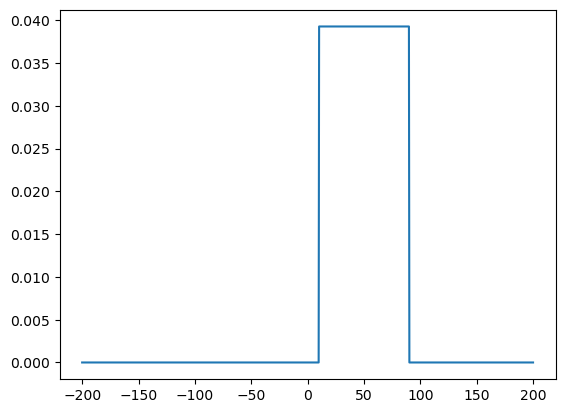

In [102]:
x = np.linspace(-200, 200, 1000)

plt.plot(x, s(x))
plt.show()

In [96]:
for i in range(3):
    print(H(i))

print(H(50))

[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.       +0.j        -0.0057577+0.0187718j]
 [-0.0057577-0.0187718j -0.       +0.j       ]]


$
U(t=0) = 
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
$

$
T = 100000
$

$
\Delta t = 0.001
$

In [103]:
T = 100000
dt = 0.001

u0 = np.array([[1, 0], [0, 1]])
print(u0)
print(u0.shape)

[[1 0]
 [0 1]]
(2, 2)


$
\frac{\partial U}{\partial t} \big| _{t+1} = -i H(t) U(t)
$

$
U_{\text{list}} = \int_0^T \big( U_{\text{current}}(t) + \frac{\partial U}{\partial t} \big| _{t+1} \Delta t \big)
$

In [98]:
current_u = u0
temp_u = 0
u_list = []

for t in range(T):
    u_list.append(current_u)
    dudt = np.matmul(-1j * H(dt*t), current_u)
    temp_u = current_u + dudt*dt
    current_u = temp_u

In [99]:
print(len(u_list))

for i in range(3):
    print(u_list[i])

100000
[[1 0]
 [0 1]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [100]:
ut = np.array(u_list)
print(ut.shape)

(100000, 2, 2)


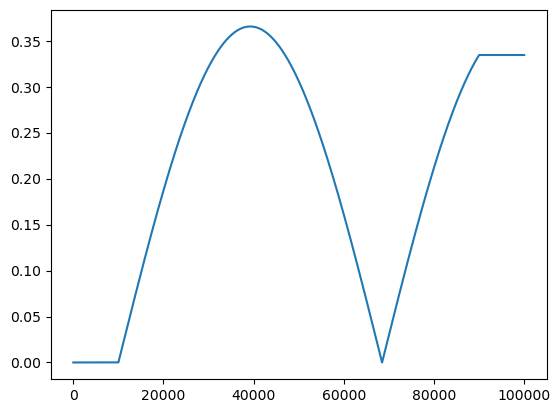

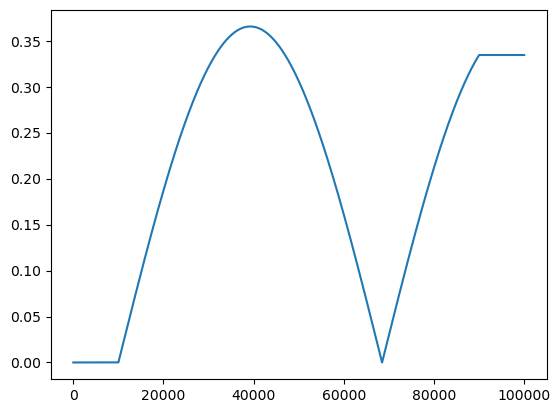

In [101]:
plt.plot(abs(ut[:, 1, 0]))
plt.show()
plt.plot(abs(ut[:, 0, 1]))
plt.show()